In [186]:
from pytorch_grad_cam import GradCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
import torch
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder
from torchvision import transforms, models
import torch.nn as nn
import numpy as np

# - parameters
model_to_test = "models/converted_vissl_swav_covid_e950_e18_layer4_fc.torch"
IMG_INDEX = 0
label_mapping = {0: "COVID", 1: "normal", 2: "pneumonia"}

# transformation
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

compose = transforms.Compose([transforms.Resize((224, 224)),
                               transforms.ToTensor(),
                               normalize])


# init datasets
traindata = ImageFolder("COVIDNet_ImageFolder/train", transform=compose)
testdata = ImageFolder("COVIDNet_ImageFolder/test", transform=compose)
testdata_no_norm = ImageFolder("COVIDNet_ImageFolder/test", transform=transforms.Resize((224, 224)))
# init model and copy weights

model = models.resnet50(pretrained=True)
model.fc = nn.Linear(2048, 3)
model.load_state_dict(torch.load(model_to_test))
target_layer = model.layer4[-1]
img, label = testdata[IMG_INDEX]
img = img.unsqueeze(0)
cam = GradCAM(model=model, target_layer=target_layer, use_cuda=True)
target_category = label
grayscale_cam = cam(input_tensor=img, target_category=target_category)

In [187]:
grayscale_cam = grayscale_cam[0, :]
orig_image, _  = testdata_no_norm[IMG_INDEX]
orig_image = np.array(orig_image)

In [188]:
orig_image = np.float32(orig_image) / 255
visualization = show_cam_on_image(orig_image, grayscale_cam)

COVID


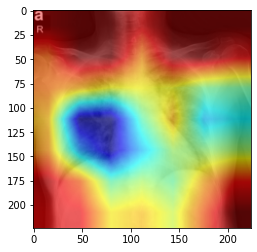

In [189]:
print(label_mapping[label])
plt.imshow(visualization)